<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


from pandas import read_hdf
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold



In [2]:
#reading
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9052856222201092 test Score 0.8624388531818281
Estimators =  50 Train Score 0.9205854226435491 test Score 0.9125880704982124
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9236181641136253 test Score 0.9185677340678285
Estimators =  450 Train Score 0.9235757391931891 test Score 0.916


Text(0.5,1,'Estimators vs score at depth of 5')

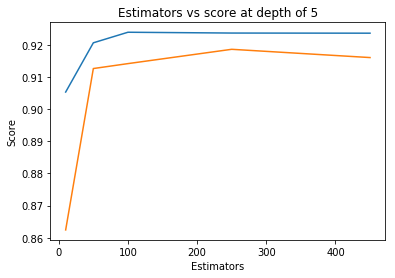

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687447491437064
depth =  9 Train Score 0.9568604259918227 test Score 0.9241779985686019
depth =  11 Train Score 0.9623061670649243 test Score 0.925683935421321
depth =  15 Train Score 0.9637427612296021 test Score 0.925901777263645
depth =  20 Train Score 0.964040453222158 test Score 0.9241437453893984
depth =  35 Train Score 0.9638693457148071 test Score 0.9242727445074043
depth =  50 Train Score 0.9638693457148071 test Score 0.9242727445074043
depth =  70 Train Score 0.9638693457148071 test Score 0.9242727445074043
depth =  130 Train Score 0.9638693457148071 test Score 0.9242727445074043


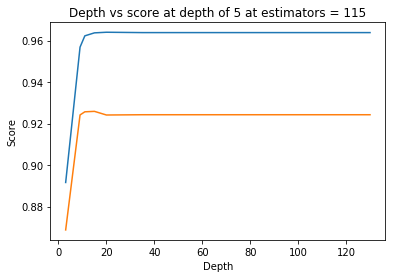

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [8]:

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96253377 0.96199907 0.96105488 0.96210591 0.9634686 ]
mean train scores [0.96306867 0.96260823 0.96145338 0.9626621  0.96426823]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [76]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [77]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [78]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9653138177100227
Test f1 score 0.9244905270700301


In [13]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


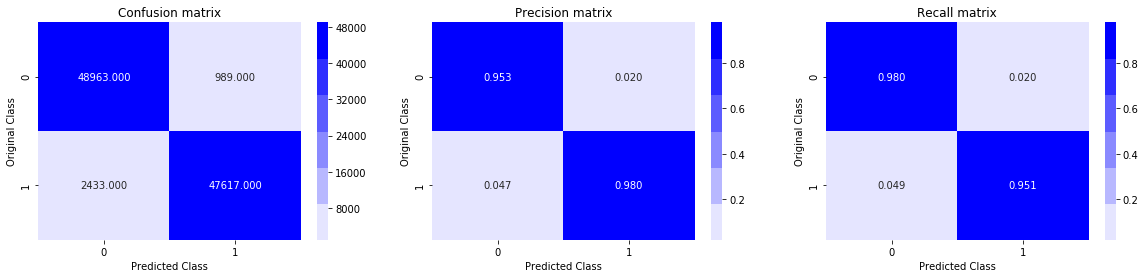

Test confusion_matrix


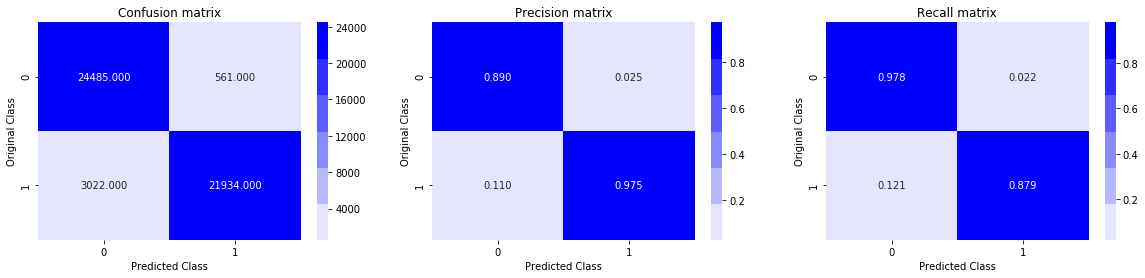

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

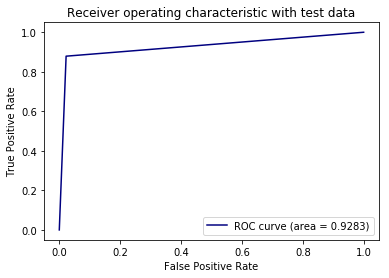

In [79]:
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.4f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

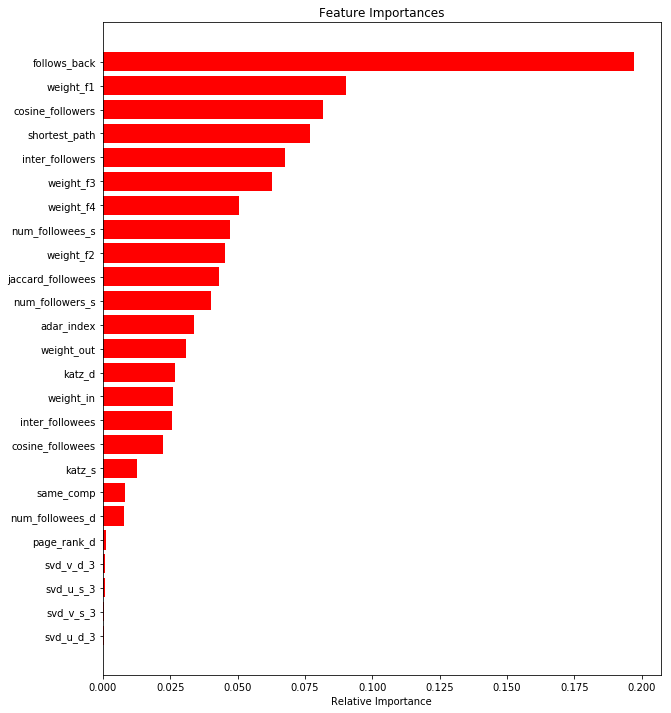

In [16]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Extra features ( 'SVD Dot' and 'Preferential Attachment' Features)

In [17]:
#reading
from pandas import read_hdf
df_final_train_ex_fea = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'train_df',mode='r')
df_final_test_ex_fea = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'test_df',mode='r')

In [18]:
y_train = df_final_train_ex_fea.indicator_link
y_test = df_final_test_ex_fea.indicator_link

In [19]:
df_final_train_ex_fea.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test_ex_fea.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.914510214772132 test Score 0.8961337246395304
Estimators =  50 Train Score 0.9192498804548951 test Score 0.9141987152748812
Estimators =  100 Train Score 0.9198725648926724 test Score 0.9154055753510794
Estimators =  250 Train Score 0.9200903217713102 test Score 0.9130974158413759
Estimators =  450 Train Score 0.9210919774578381 test Score 0.9163448623237072


Text(0.5,1,'Estimators vs score at depth of 5')

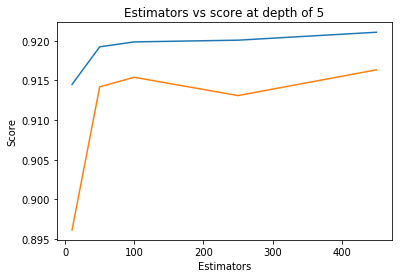

In [20]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train_ex_fea,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train_ex_fea))
    test_sc = f1_score(y_test,clf.predict(df_final_test_ex_fea))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9066677669582439 test Score 0.8909813768570831
depth =  9 Train Score 0.9580068273296988 test Score 0.9236473959211192
depth =  11 Train Score 0.9612960930194739 test Score 0.9243474413803274
depth =  15 Train Score 0.9630999309139676 test Score 0.925539757767246
depth =  20 Train Score 0.9633531277963069 test Score 0.925379435543453
depth =  35 Train Score 0.9633614334089223 test Score 0.9260399966247574
depth =  50 Train Score 0.9633614334089223 test Score 0.9260399966247574
depth =  70 Train Score 0.9633614334089223 test Score 0.9260399966247574
depth =  130 Train Score 0.9633614334089223 test Score 0.9260399966247574


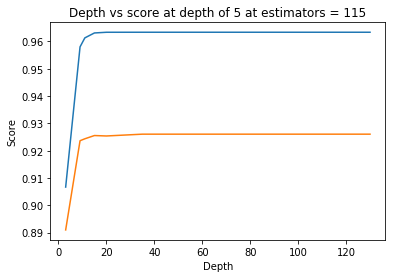

In [21]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train_ex_fea,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train_ex_fea))
    test_sc = f1_score(y_test,clf.predict(df_final_test_ex_fea))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [22]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train_ex_fea,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96205619 0.96197243 0.96043338 0.96158532 0.96336833]
mean train scores [0.96299731 0.96278864 0.96110006 0.96227293 0.96426834]


In [23]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [24]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [25]:
clf.fit(df_final_train_ex_fea,y_train)
y_train_pred = clf.predict(df_final_train_ex_fea)
y_test_pred = clf.predict(df_final_test_ex_fea)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9643538630181478
Test f1 score 0.9265303543978606


Train confusion_matrix


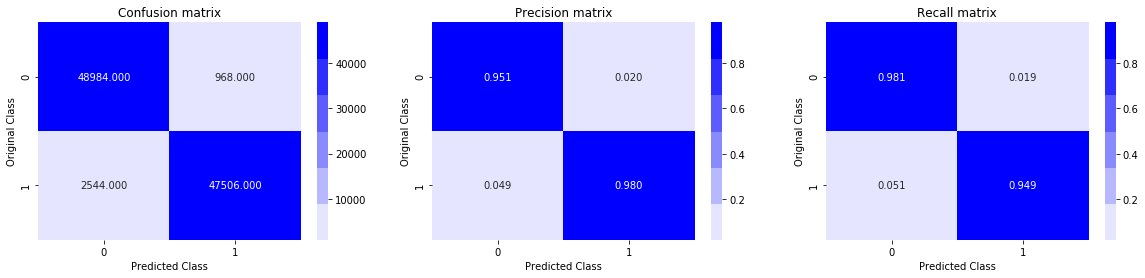

Test confusion_matrix


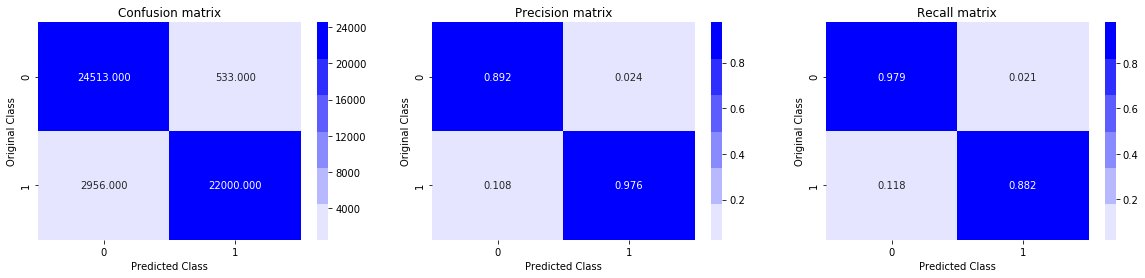

In [26]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

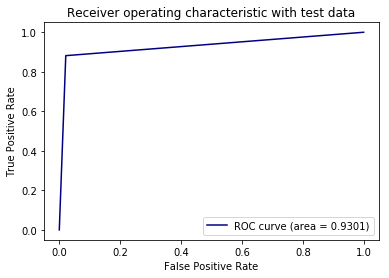

In [27]:
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.4f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

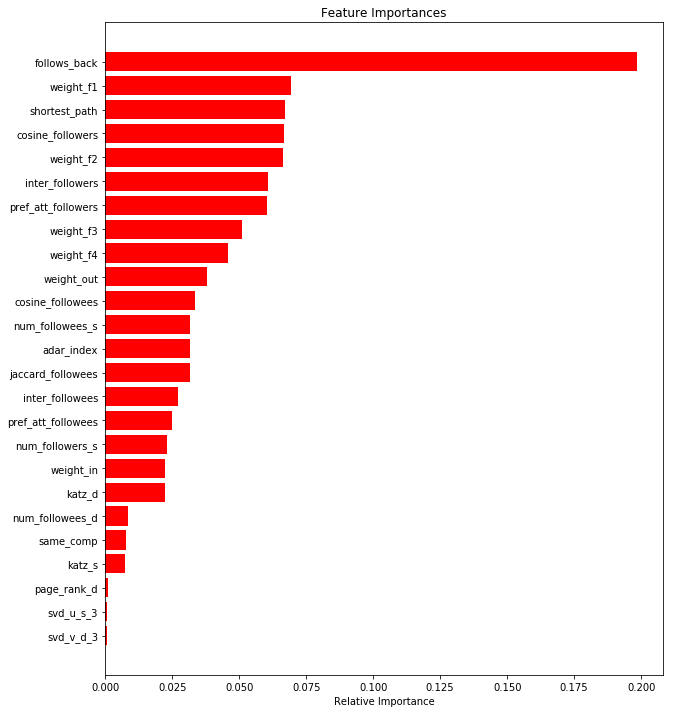

In [28]:
features = df_final_train_ex_fea.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Apply XGBOOST

In [44]:
depth_ = [9,10,11,12,13,14,15]
depth_ = np.asarray(depth_)

estimators = [110,115,120,130]
estimators_list = np.asarray(estimators)

colsample_bytree = [0.1, 0.3, 0.5, 0.7]
colsample_bytree = np.asarray(colsample_bytree)

subsample = [0.1,0.3,0.5,0.7]
colsample_bytree = np.asarray(subsample)


def finding_best_hyperparam(X_tr,y_tr):
    # instantiate a GBDT model
    xgb = XGBClassifier(class_weight='balanced', random_state=1)
    
    cross_val = StratifiedKFold(n_splits=5, shuffle=True)

    param_grid=dict(n_estimators=estimators_list,max_depth=depth_,colsample_bytree = colsample_bytree,
                      subsample = subsample) 
    
    # instantiate the training random search model
    train_grid = RandomizedSearchCV(xgb, param_grid, cv=cross_val,scoring='f1',n_jobs =-1,verbose=8 )
    
    # fit the training data to train model
    train_grid.fit(X_tr, y_tr)

    return train_grid

In [45]:
hyp_train_= finding_best_hyperparam(df_final_train_ex_fea,y_train)

print("Best: %f using %s" % (hyp_train_.best_score_, hyp_train_.best_params_))
print('=='*50)
means = hyp_train_.cv_results_['mean_test_score']
params = hyp_train_.cv_results_['params']

for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.4min
/home/pranay/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a mem

Best: 0.980289 using {'subsample': 0.5, 'n_estimators': 115, 'max_depth': 13, 'colsample_bytree': 0.5}
0.979947 with: {'subsample': 0.3, 'n_estimators': 120, 'max_depth': 13, 'colsample_bytree': 0.7}
0.970436 with: {'subsample': 0.7, 'n_estimators': 110, 'max_depth': 10, 'colsample_bytree': 0.1}
0.980257 with: {'subsample': 0.7, 'n_estimators': 130, 'max_depth': 15, 'colsample_bytree': 0.5}
0.971019 with: {'subsample': 0.5, 'n_estimators': 120, 'max_depth': 9, 'colsample_bytree': 0.1}
0.964153 with: {'subsample': 0.1, 'n_estimators': 120, 'max_depth': 14, 'colsample_bytree': 0.1}
0.979263 with: {'subsample': 0.5, 'n_estimators': 110, 'max_depth': 15, 'colsample_bytree': 0.3}
0.980044 with: {'subsample': 0.7, 'n_estimators': 110, 'max_depth': 10, 'colsample_bytree': 0.7}
0.969145 with: {'subsample': 0.3, 'n_estimators': 120, 'max_depth': 11, 'colsample_bytree': 0.1}
0.980289 with: {'subsample': 0.5, 'n_estimators': 115, 'max_depth': 13, 'colsample_bytree': 0.5}
0.978737 with: {'subsampl

In [46]:
hyp_train_.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.5, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=13,
       min_child_weight=1, missing=None, n_estimators=115, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5)

In [53]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.5, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=13,
       min_child_weight=1, missing=None, n_estimators=115, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5)

In [54]:
clf.fit(df_final_train_ex_fea,y_train)
y_train_pred = clf.predict(df_final_train_ex_fea)
y_test_pred = clf.predict(df_final_test_ex_fea)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9986502024696295
Test f1 score 0.9299974621436428


Train confusion_matrix


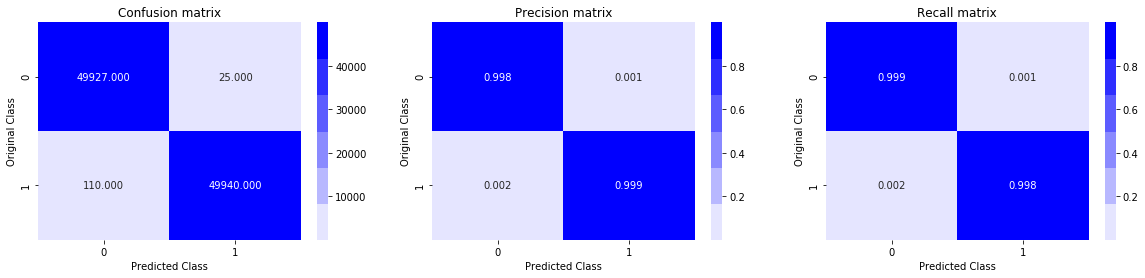

Test confusion_matrix


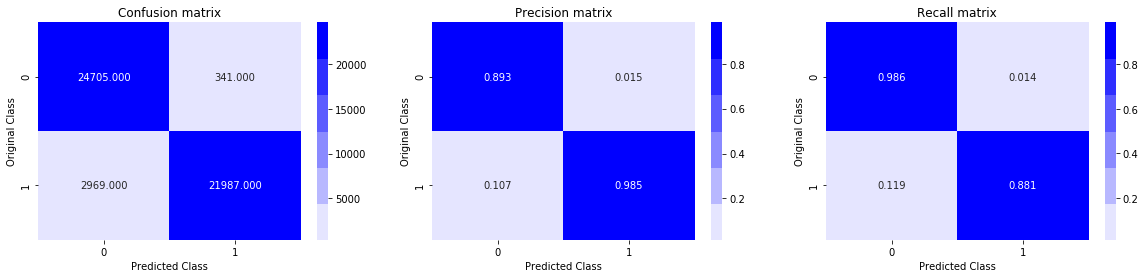

In [55]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

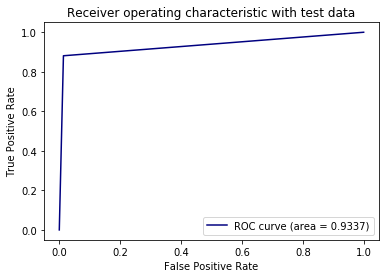

In [56]:
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.4f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

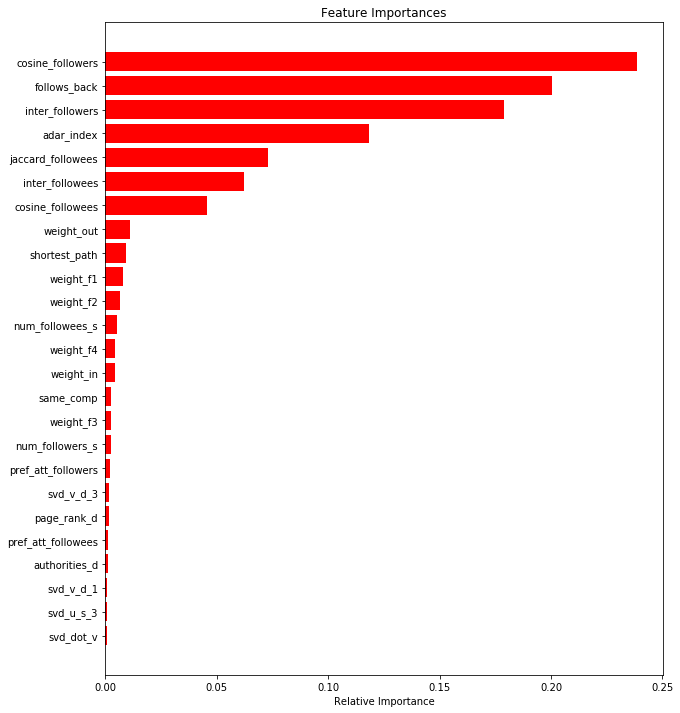

In [57]:
features = df_final_train_ex_fea.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Apply Adaboost

In [68]:
from sklearn.ensemble import AdaBoostClassifier

estimators = [110,115,120,130]
estimators_list = np.asarray(estimators)

learning_rate = [0.1, 0.3, 0.5, 0.7,0.9]
learning_rate = np.asarray(learning_rate)

algo= ['SAMME','SAMME.R']

def finding_best_hyperparamADa(X_tr,y_tr):
    # instantiate a Adabboost model
    xgb = AdaBoostClassifier( random_state=1)
    
    cross_val = StratifiedKFold(n_splits=5, shuffle=True)

    param_grid=dict(n_estimators=estimators_list,learning_rate = learning_rate, algorithm=algo) 
    
    # instantiate the training random search model
    train_grid = RandomizedSearchCV(xgb, param_grid, cv=cross_val,scoring='f1',n_jobs =-1,verbose=8 )
    
    # fit the training data to train model
    train_grid.fit(X_tr, y_tr)

    return train_grid

In [69]:
hyp_train_= finding_best_hyperparamADa(df_final_train_ex_fea,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.8min finished


In [71]:
print("Best: %f using %s" % (hyp_train_.best_score_, hyp_train_.best_params_))
print('=='*50)
means = hyp_train_.cv_results_['mean_test_score']
params = hyp_train_.cv_results_['params']

for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.968731 using {'n_estimators': 130, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
0.967891 with: {'n_estimators': 115, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
0.958494 with: {'n_estimators': 110, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
0.960263 with: {'n_estimators': 110, 'learning_rate': 0.9, 'algorithm': 'SAMME'}
0.960600 with: {'n_estimators': 130, 'learning_rate': 0.9, 'algorithm': 'SAMME'}
0.926371 with: {'n_estimators': 120, 'learning_rate': 0.3, 'algorithm': 'SAMME'}
0.966594 with: {'n_estimators': 120, 'learning_rate': 0.3, 'algorithm': 'SAMME.R'}
0.968731 with: {'n_estimators': 130, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
0.890187 with: {'n_estimators': 120, 'learning_rate': 0.1, 'algorithm': 'SAMME'}
0.940913 with: {'n_estimators': 110, 'learning_rate': 0.5, 'algorithm': 'SAMME'}
0.957737 with: {'n_estimators': 130, 'learning_rate': 0.7, 'algorithm': 'SAMME'}


In [70]:
hyp_train_.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=130, random_state=1)

In [72]:
clf = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=130, random_state=1)

clf.fit(df_final_train_ex_fea,y_train)
y_train_pred = clf.predict(df_final_train_ex_fea)
y_test_pred = clf.predict(df_final_test_ex_fea)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9684893983970784
Test f1 score 0.9238307349665924


Train confusion_matrix


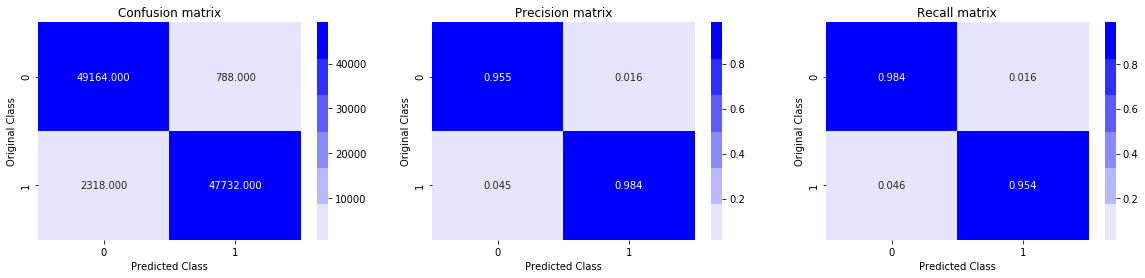

Test confusion_matrix


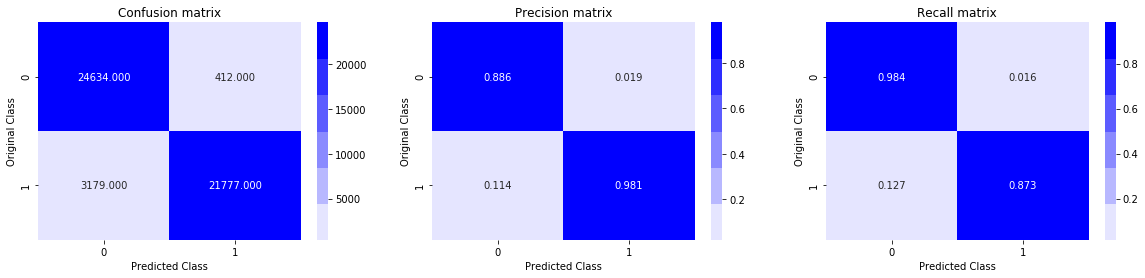

In [73]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

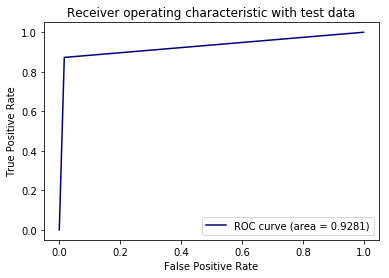

In [74]:
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.4f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

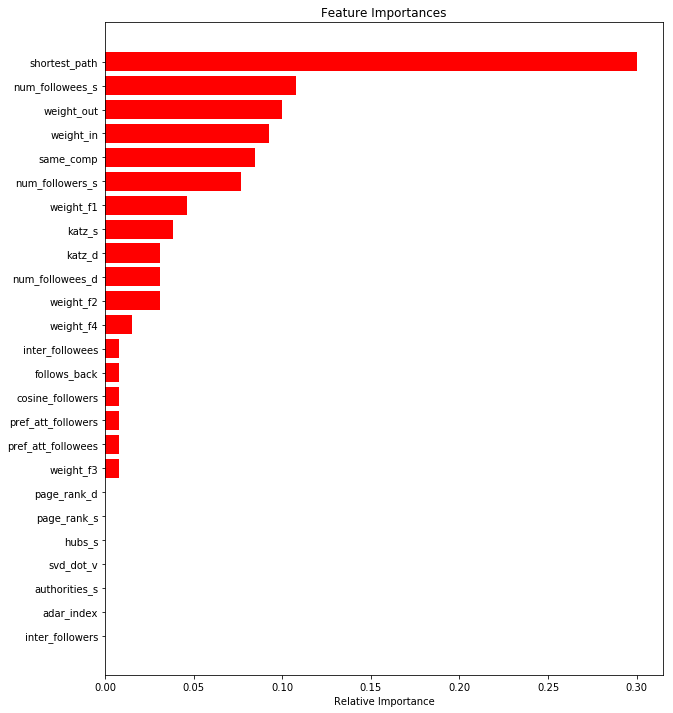

In [75]:
features = df_final_train_ex_fea.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Conclusion

In [80]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score","AUC"]
x.add_row(['Random Forest','121','14','0.96531','0.92449','0.9283'])
x.add_row(['Random Forest Extra features','121','14','0.96435','0.92653','0.9301'])
x.add_row(['XGBOOST','115','13','0.99864','0.93001','0.9337'])
x.add_row(['AdaBOOST','130','--','0.96849','0.92380','0.9281'])

print(x)

+------------------------------+--------------+-----------+----------------+---------------+--------+
|            Model             | n_estimators | max_depth | Train f1-Score | Test f1-Score |  AUC   |
+------------------------------+--------------+-----------+----------------+---------------+--------+
|        Random Forest         |     121      |     14    |    0.96531     |    0.92449    | 0.9283 |
| Random Forest Extra features |     121      |     14    |    0.96435     |    0.92653    | 0.9301 |
|           XGBOOST            |     115      |     13    |    0.99864     |    0.93001    | 0.9337 |
|           AdaBOOST           |     130      |     --    |    0.96849     |    0.92380    | 0.9281 |
+------------------------------+--------------+-----------+----------------+---------------+--------+


## Summary

- We have consider around 100k datapoints for above task.
- Firstly we perform some feature engineering on graph data like finding shortest path, kartz centrality, jaccard distances, page rank etc. and tested model performance with Random Forest
- Then we added some extra features like preferential attachements, SVD dot. again tested model performance with Random Forest.
- Then try slightly different model like GBDT with XGBOOST.
- Still we can see there no big difference between model performance. However GBDT performing slightly better than Random Forest.
- We tested against AdaBoost, yet XGBOOST perform better among all.